Diretório 'analise_motor' criado com sucesso.
ANÁLISE DE MOTOR CC - AVALIAÇÃO 03

DADOS DO MOTOR:
Ra = 7.75 Ω
La = 4.1 H
Kt = 0.0131 Nm/A
Kb = 0.0131 V.s/rad
J = 5.2e-07 kg.m²
B = 2.7e-07 N.m.s/rad

DADOS DA CARGA:
Jc = 5.2e-05 kg.m²
Bc = 2.7e-06 N.m.s/rad

TAREFA 2: FUNÇÃO DE TRANSFERÊNCIA - MOTOR SEM CARGA

Parâmetros totais (sem carga):
Jm = J = 5.2e-07 kg.m²
Bm = B = 2.7e-07 N.m.s/rad

Coeficientes do denominador:
a = La × Jm = 4.1 × 5.2e-07 = 2.132000e-06
b = Ra × Jm + La × Bm = 7.75 × 5.2e-07 + 4.1 × 2.7e-07 = 5.137000e-06
c = Ra × Bm + Kt × Kb = 7.75 × 2.7e-07 + 0.0131 × 0.0131 = 1.737025e-04

Numerador:
Kt = 0.0131

Função de Transferência G(s) = ω(s)/Va(s):
G(s) = 0.0131 / (2.132000e-06s² + 5.137000e-06s + 1.737025e-04)

TAREFA 3: ANÁLISE DE ZEROS, POLOS E MODOS - MOTOR SEM CARGA

Zeros:
  Não há zeros (numerador é constante)

Polos:
  p1 = -1.204737+8.945534j
  p2 = -1.204737-8.945534j

Análise dos Polos:
  Tipo: Polos COMPLEXOS CONJUGADOS (sistema subamortecido)
  σ (parte r

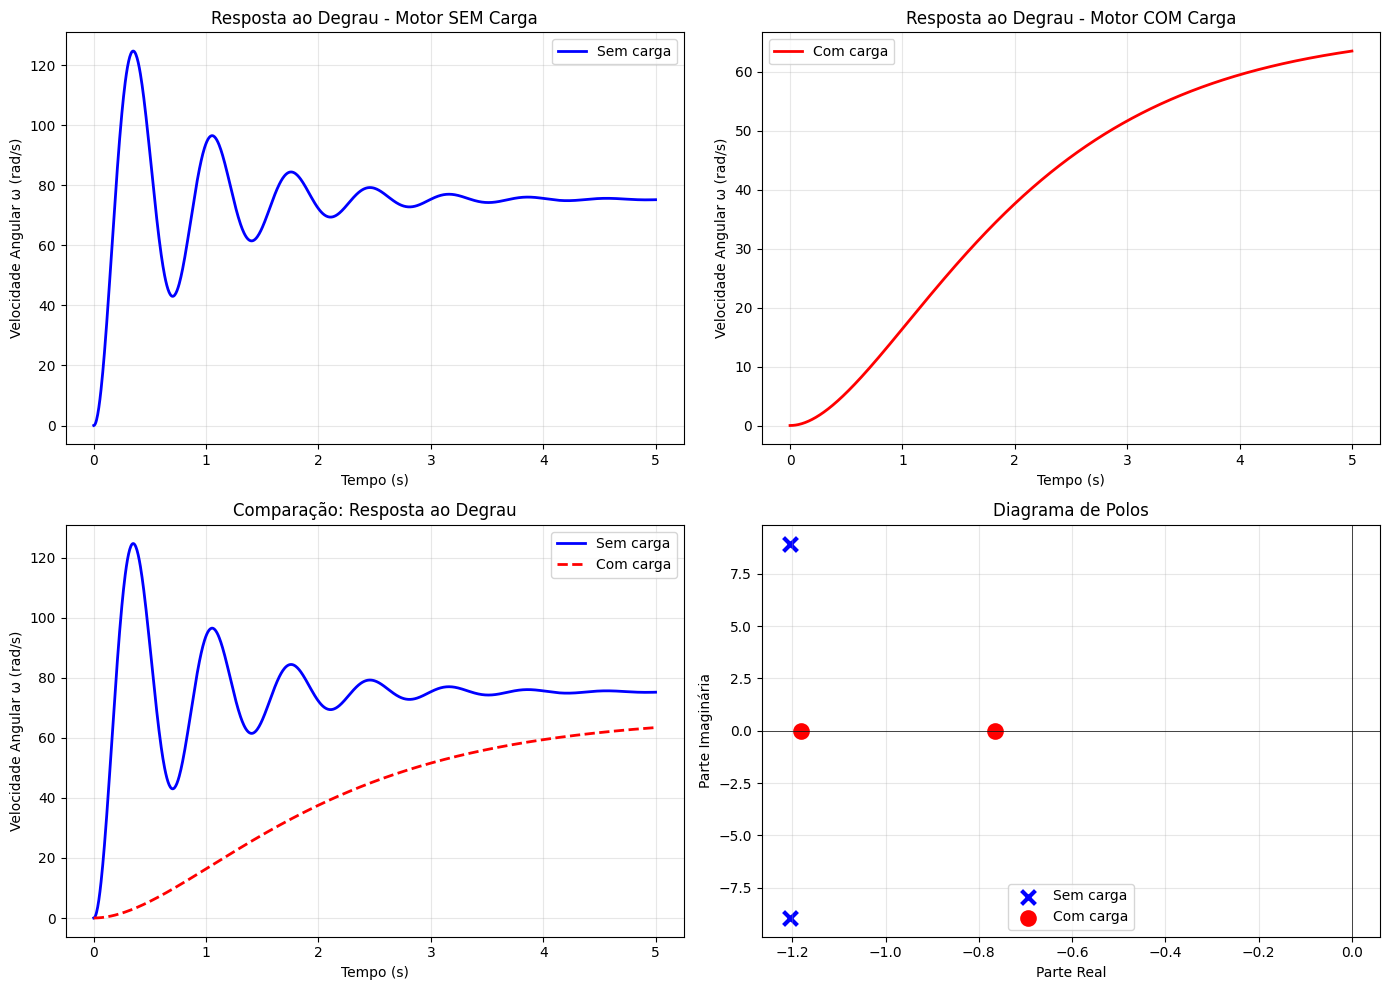

Diagrama de Bode salvo em: analise_motor/diagrama_bode.png


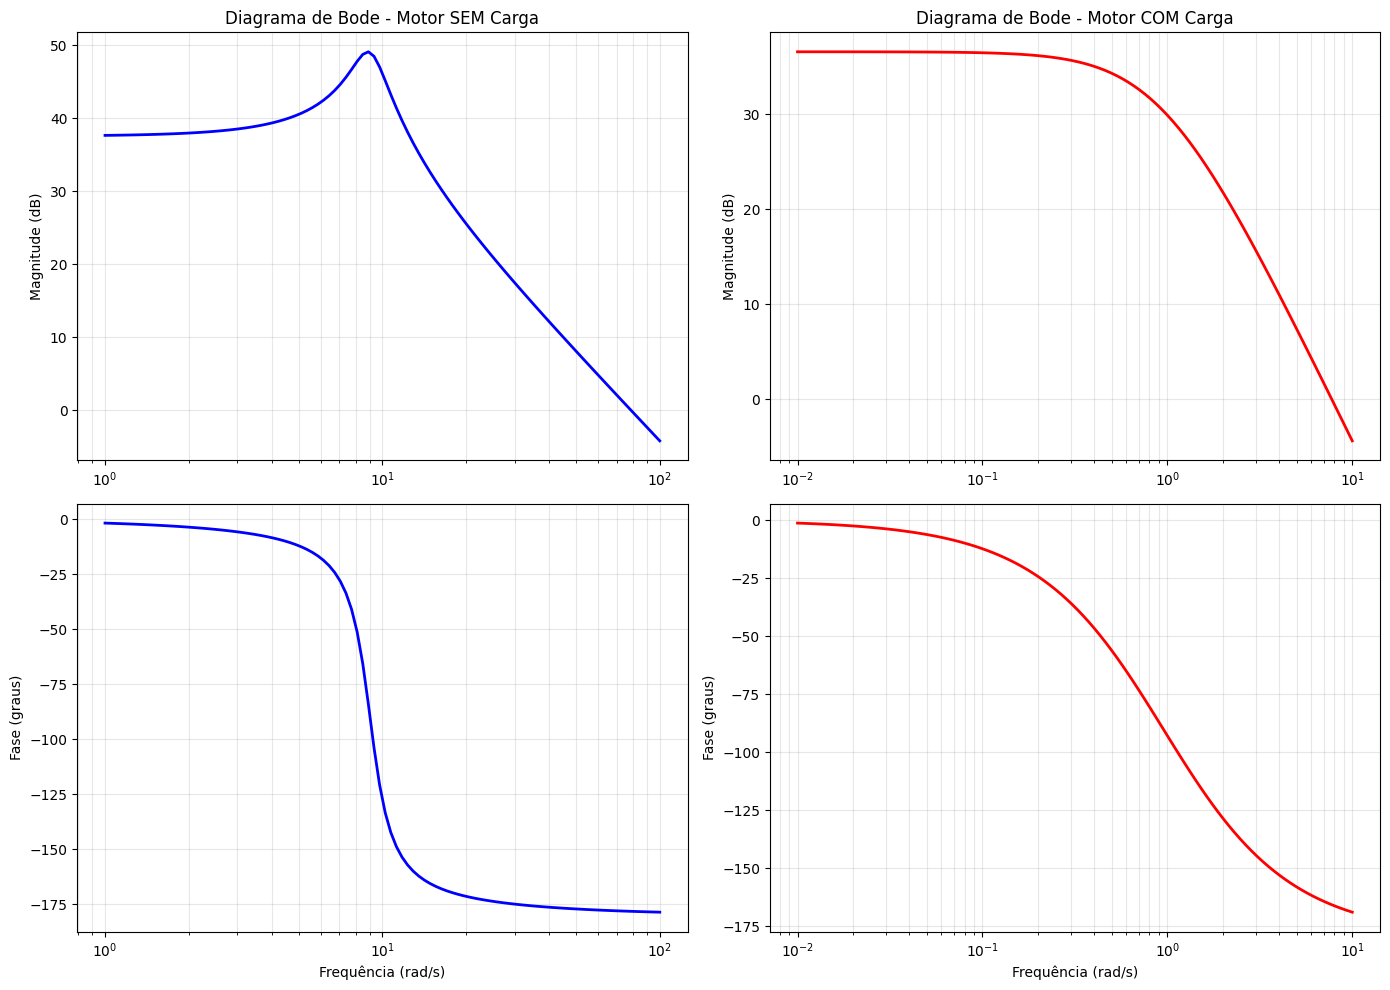


ANÁLISE COMPLETA FINALIZADA!


In [1]:
#!/usr/bin/env python3
"""
Análise de Motor CC - Ajustado para Google Colab
Sinais e Sistemas Lineares
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

# Configuração para exibição de equações (opcional no output de texto, mas útil se expandir)
sp.init_printing()

# ============================================================================
# CONFIGURAÇÃO DE AMBIENTE (COLAB)
# ============================================================================
# Cria um diretório para salvar os resultados se não existir
OUTPUT_DIR = 'analise_motor'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Diretório '{OUTPUT_DIR}' criado com sucesso.")

# ============================================================================
# DADOS DO MOTOR 1
# ============================================================================
Ra = 7.75          # Resistência de armadura [Ohm]
La = 4.1           # Indutância de armadura [H]
Kt = 0.0131        # Constante de torque [Nm/A]
Kb = 0.0131        # Constante de força contra-eletromotriz [V.s/rad]
J = 5.2e-7         # Inércia do motor [kg.m²]
B = 2.7e-7         # Atrito do motor [N.m.s/rad]

# Parâmetros da carga
Jc = 52e-6         # Inércia da carga [kg.m²]
Bc = 2.7e-6        # Atrito da carga [N.m.s/rad]

print("="*80)
print("ANÁLISE DE MOTOR CC - AVALIAÇÃO 03")
print("="*80)
print("\nDADOS DO MOTOR:")
print(f"Ra = {Ra} Ω")
print(f"La = {La} H")
print(f"Kt = {Kt} Nm/A")
print(f"Kb = {Kb} V.s/rad")
print(f"J = {J} kg.m²")
print(f"B = {B} N.m.s/rad")
print(f"\nDADOS DA CARGA:")
print(f"Jc = {Jc} kg.m²")
print(f"Bc = {Bc} N.m.s/rad")

# ============================================================================
# TAREFA 2: MOTOR SEM CARGA
# ============================================================================
print("\n" + "="*80)
print("TAREFA 2: FUNÇÃO DE TRANSFERÊNCIA - MOTOR SEM CARGA")
print("="*80)

Jm_sem_carga = J
Bm_sem_carga = B

# Coeficientes do polinômio característico: a*s² + b*s + c
a_sem = La * Jm_sem_carga
b_sem = Ra * Jm_sem_carga + La * Bm_sem_carga
c_sem = Ra * Bm_sem_carga + Kt * Kb

print(f"\nParâmetros totais (sem carga):")
print(f"Jm = J = {Jm_sem_carga} kg.m²")
print(f"Bm = B = {Bm_sem_carga} N.m.s/rad")

print(f"\nCoeficientes do denominador:")
print(f"a = La × Jm = {La} × {Jm_sem_carga} = {a_sem:.6e}")
print(f"b = Ra × Jm + La × Bm = {Ra} × {Jm_sem_carga} + {La} × {Bm_sem_carga} = {b_sem:.6e}")
print(f"c = Ra × Bm + Kt × Kb = {Ra} × {Bm_sem_carga} + {Kt} × {Kb} = {c_sem:.6e}")

# Numerador
num_sem = Kt

print(f"\nNumerador:")
print(f"Kt = {num_sem}")

# Função de transferência
num_sem_array = [num_sem]
den_sem_array = [a_sem, b_sem, c_sem]

print(f"\nFunção de Transferência G(s) = ω(s)/Va(s):")
print(f"G(s) = {num_sem} / ({a_sem:.6e}s² + {b_sem:.6e}s + {c_sem:.6e})")

# Criar sistema de transferência
sys_sem_carga = signal.TransferFunction(num_sem_array, den_sem_array)

# ============================================================================
# TAREFA 3: ANÁLISE - MOTOR SEM CARGA
# ============================================================================
print("\n" + "="*80)
print("TAREFA 3: ANÁLISE DE ZEROS, POLOS E MODOS - MOTOR SEM CARGA")
print("="*80)

# Zeros
zeros_sem = np.roots(num_sem_array) if len(num_sem_array) > 1 else []
print(f"\nZeros:")
if len(zeros_sem) == 0:
    print("  Não há zeros (numerador é constante)")
else:
    for i, z in enumerate(zeros_sem, 1):
        print(f"  z{i} = {z}")

# Polos
polos_sem = np.roots(den_sem_array)
print(f"\nPolos:")
for i, p in enumerate(polos_sem, 1):
    if np.isreal(p):
        print(f"  p{i} = {np.real(p):.6f}")
    else:
        print(f"  p{i} = {p:.6f}")

# Análise dos polos
print(f"\nAnálise dos Polos:")
if np.all(np.isreal(polos_sem)):
    print("  Tipo: Polos REAIS (sistema superamortecido)")
    print(f"  Ambos os polos são negativos: sistema ESTÁVEL")
    p1, p2 = sorted(np.real(polos_sem))
    print(f"  Polo dominante: p1 = {p1:.6f} (mais próximo do eixo imaginário)")
    print(f"  Polo rápido: p2 = {p2:.6f}")
else:
    parte_real = np.real(polos_sem[0])
    parte_imag = np.abs(np.imag(polos_sem[0]))
    print("  Tipo: Polos COMPLEXOS CONJUGADOS (sistema subamortecido)")
    print(f"  σ (parte real) = {parte_real:.6f}")
    print(f"  ωd (frequência natural amortecida) = {parte_imag:.6f} rad/s")
    if parte_real < 0:
        print(f"  Sistema ESTÁVEL (parte real negativa)")

    # Calcular parâmetros do sistema de segunda ordem
    wn = np.sqrt(c_sem / a_sem)  # Frequência natural não amortecida
    zeta = b_sem / (2 * np.sqrt(a_sem * c_sem))  # Coeficiente de amortecimento
    print(f"  ωn (frequência natural) = {wn:.6f} rad/s")
    print(f"  ζ (coeficiente de amortecimento) = {zeta:.6f}")

# Modos característicos
print(f"\nModos Característicos:")
for i, p in enumerate(polos_sem, 1):
    if np.isreal(p):
        tau = -1/np.real(p)
        print(f"  Modo {i}: e^({np.real(p):.6f}t) com constante de tempo τ{i} = {tau:.6f} s")
    else:
        sigma = np.real(p)
        omega = np.abs(np.imag(p))
        tau = -1/sigma
        print(f"  Modo {i}: e^({sigma:.6f}t) × [cos({omega:.6f}t) + sin({omega:.6f}t)]")
        print(f"           Constante de tempo τ = {tau:.6f} s")

# ============================================================================
# TAREFA 4: MOTOR COM CARGA
# ============================================================================
print("\n" + "="*80)
print("TAREFA 4: FUNÇÃO DE TRANSFERÊNCIA - MOTOR COM CARGA")
print("="*80)

Jm_com_carga = J + Jc
Bm_com_carga = B + Bc

# Coeficientes do polinômio característico
a_com = La * Jm_com_carga
b_com = Ra * Jm_com_carga + La * Bm_com_carga
c_com = Ra * Bm_com_carga + Kt * Kb

print(f"\nParâmetros totais (com carga):")
print(f"Jm = J + Jc = {J} + {Jc} = {Jm_com_carga} kg.m²")
print(f"Bm = B + Bc = {B} + {Bc} = {Bm_com_carga} N.m.s/rad")

print(f"\nCoeficientes do denominador:")
print(f"a = La × Jm = {La} × {Jm_com_carga} = {a_com:.6e}")
print(f"b = Ra × Jm + La × Bm = {Ra} × {Jm_com_carga} + {La} × {Bm_com_carga} = {b_com:.6e}")
print(f"c = Ra × Bm + Kt × Kb = {Ra} × {Bm_com_carga} + {Kt} × {Kb} = {c_com:.6e}")

# Numerador
num_com = Kt

print(f"\nNumerador:")
print(f"Kt = {num_com}")

# Função de transferência
num_com_array = [num_com]
den_com_array = [a_com, b_com, c_com]

print(f"\nFunção de Transferência G(s) = ω(s)/Va(s):")
print(f"G(s) = {num_com} / ({a_com:.6e}s² + {b_com:.6e}s + {c_com:.6e})")

# Criar sistema de transferência
sys_com_carga = signal.TransferFunction(num_com_array, den_com_array)

# ============================================================================
# TAREFA 5: ANÁLISE - MOTOR COM CARGA
# ============================================================================
print("\n" + "="*80)
print("TAREFA 5: ANÁLISE DE ZEROS, POLOS E MODOS - MOTOR COM CARGA")
print("="*80)

# Zeros
zeros_com = np.roots(num_com_array) if len(num_com_array) > 1 else []
print(f"\nZeros:")
if len(zeros_com) == 0:
    print("  Não há zeros (numerador é constante)")
else:
    for i, z in enumerate(zeros_com, 1):
        print(f"  z{i} = {z}")

# Polos
polos_com = np.roots(den_com_array)
print(f"\nPolos:")
for i, p in enumerate(polos_com, 1):
    if np.isreal(p):
        print(f"  p{i} = {np.real(p):.6f}")
    else:
        print(f"  p{i} = {p:.6f}")

# Análise dos polos
print(f"\nAnálise dos Polos:")
if np.all(np.isreal(polos_com)):
    print("  Tipo: Polos REAIS (sistema superamortecido)")
    print(f"  Ambos os polos são negativos: sistema ESTÁVEL")
    p1, p2 = sorted(np.real(polos_com))
    print(f"  Polo dominante: p1 = {p1:.6f} (mais próximo do eixo imaginário)")
    print(f"  Polo rápido: p2 = {p2:.6f}")
else:
    parte_real = np.real(polos_com[0])
    parte_imag = np.abs(np.imag(polos_com[0]))
    print("  Tipo: Polos COMPLEXOS CONJUGADOS (sistema subamortecido)")
    print(f"  σ (parte real) = {parte_real:.6f}")
    print(f"  ωd (frequência natural amortecida) = {parte_imag:.6f} rad/s")
    if parte_real < 0:
        print(f"  Sistema ESTÁVEL (parte real negativa)")

    # Calcular parâmetros do sistema de segunda ordem
    wn = np.sqrt(c_com / a_com)
    zeta = b_com / (2 * np.sqrt(a_com * c_com))
    print(f"  ωn (frequência natural) = {wn:.6f} rad/s")
    print(f"  ζ (coeficiente de amortecimento) = {zeta:.6f}")

# Modos característicos
print(f"\nModos Característicos:")
for i, p in enumerate(polos_com, 1):
    if np.isreal(p):
        tau = -1/np.real(p)
        print(f"  Modo {i}: e^({np.real(p):.6f}t) com constante de tempo τ{i} = {tau:.6f} s")
    else:
        sigma = np.real(p)
        omega = np.abs(np.imag(p))
        tau = -1/sigma
        print(f"  Modo {i}: e^({sigma:.6f}t) × [cos({omega:.6f}t) + sin({omega:.6f}t)]")
        print(f"           Constante de tempo τ = {tau:.6f} s")

# ============================================================================
# TAREFA 6: COMPARAÇÃO
# ============================================================================
print("\n" + "="*80)
print("TAREFA 6: COMPARAÇÃO - MOTOR SEM CARGA vs COM CARGA")
print("="*80)

print("\n1. COMPARAÇÃO DE ZEROS:")
print("   Sem carga: Não há zeros")
print("   Com carga: Não há zeros")
print("   Conclusão: A adição de carga não introduz zeros no sistema.")

print("\n2. COMPARAÇÃO DE POLOS:")
print("   Sem carga:")
for i, p in enumerate(polos_sem, 1):
    if np.isreal(p):
        print(f"     p{i} = {np.real(p):.6f}")
    else:
        print(f"     p{i} = {p:.6f}")

print("   Com carga:")
for i, p in enumerate(polos_com, 1):
    if np.isreal(p):
        print(f"     p{i} = {np.real(p):.6f}")
    else:
        print(f"     p{i} = {p:.6f}")

# Variação percentual dos polos
print("\n   Variação dos polos:")
if np.all(np.isreal(polos_sem)) and np.all(np.isreal(polos_com)):
    for i in range(len(polos_sem)):
        p_sem = np.real(polos_sem[i])
        p_com = np.real(polos_com[i])
        variacao = ((p_com - p_sem) / p_sem) * 100
        print(f"     Polo {i+1}: {p_sem:.6f} → {p_com:.6f} (variação: {variacao:.2f}%)")

print("\n3. MUDANÇA NOS MODOS CARACTERÍSTICOS:")
tipo_sem = "REAIS" if np.all(np.isreal(polos_sem)) else "COMPLEXOS"
tipo_com = "REAIS" if np.all(np.isreal(polos_com)) else "COMPLEXOS"

print(f"   Sem carga: Polos {tipo_sem}")
print(f"   Com carga: Polos {tipo_com}")

if tipo_sem == tipo_com:
    print(f"   Conclusão: NÃO houve mudança no tipo dos modos característicos.")
    print(f"              O sistema permanece com polos {tipo_sem}.")
else:
    print(f"   Conclusão: SIM, houve mudança no tipo dos modos característicos!")
    print(f"              O sistema mudou de polos {tipo_sem} para polos {tipo_com}.")

print("\n4. ANÁLISE FÍSICA:")
print(f"   - Inércia aumentou de {Jm_sem_carga:.6e} para {Jm_com_carga:.6e} kg.m²")
print(f"     (aumento de {((Jm_com_carga/Jm_sem_carga - 1)*100):.1f}%)")
print(f"   - Atrito aumentou de {Bm_sem_carga:.6e} para {Bm_com_carga:.6e} N.m.s/rad")
print(f"     (aumento de {((Bm_com_carga/Bm_sem_carga - 1)*100):.1f}%)")
print(f"   - Os polos se aproximaram da origem (sistema mais lento)")
print(f"   - O sistema mantém estabilidade em ambos os casos")

# ============================================================================
# SALVAR RESULTADOS EM ARQUIVO
# ============================================================================
# Definindo caminho do arquivo de texto
txt_filepath = os.path.join(OUTPUT_DIR, 'resultados_numericos.txt')

with open(txt_filepath, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("RESULTADOS NUMÉRICOS - ANÁLISE DE MOTOR CC\n")
    f.write("="*80 + "\n\n")

    f.write("MOTOR SEM CARGA:\n")
    f.write(f"  Função de Transferência:\n")
    f.write(f"  G(s) = {num_sem} / ({a_sem:.6e}s² + {b_sem:.6e}s + {c_sem:.6e})\n\n")
    f.write(f"  Polos:\n")
    for i, p in enumerate(polos_sem, 1):
        if np.isreal(p):
            f.write(f"    p{i} = {np.real(p):.6f}\n")
        else:
            f.write(f"    p{i} = {p:.6f}\n")

    f.write("\n" + "="*80 + "\n\n")

    f.write("MOTOR COM CARGA:\n")
    f.write(f"  Função de Transferência:\n")
    f.write(f"  G(s) = {num_com} / ({a_com:.6e}s² + {b_com:.6e}s + {c_com:.6e})\n\n")
    f.write(f"  Polos:\n")
    for i, p in enumerate(polos_com, 1):
        if np.isreal(p):
            f.write(f"    p{i} = {np.real(p):.6f}\n")
        else:
            f.write(f"    p{i} = {p:.6f}\n")

print("\n" + "="*80)
print(f"Resultados salvos em: {txt_filepath}")
print("="*80)

# ============================================================================
# GRÁFICOS
# ============================================================================
print("\nGerando gráficos...")

# Resposta ao degrau
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Resposta ao degrau - sem carga
t_sem, y_sem = signal.step(sys_sem_carga, T=np.linspace(0, 5, 1000))
axes[0, 0].plot(t_sem, y_sem, 'b-', linewidth=2, label='Sem carga')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlabel('Tempo (s)')
axes[0, 0].set_ylabel('Velocidade Angular ω (rad/s)')
axes[0, 0].set_title('Resposta ao Degrau - Motor SEM Carga')
axes[0, 0].legend()

# 2. Resposta ao degrau - com carga
t_com, y_com = signal.step(sys_com_carga, T=np.linspace(0, 5, 1000))
axes[0, 1].plot(t_com, y_com, 'r-', linewidth=2, label='Com carga')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlabel('Tempo (s)')
axes[0, 1].set_ylabel('Velocidade Angular ω (rad/s)')
axes[0, 1].set_title('Resposta ao Degrau - Motor COM Carga')
axes[0, 1].legend()

# 3. Comparação das respostas ao degrau
axes[1, 0].plot(t_sem, y_sem, 'b-', linewidth=2, label='Sem carga')
axes[1, 0].plot(t_com, y_com, 'r--', linewidth=2, label='Com carga')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlabel('Tempo (s)')
axes[1, 0].set_ylabel('Velocidade Angular ω (rad/s)')
axes[1, 0].set_title('Comparação: Resposta ao Degrau')
axes[1, 0].legend()

# 4. Diagrama de polos
axes[1, 1].scatter(np.real(polos_sem), np.imag(polos_sem),
                   s=100, marker='x', c='blue', linewidths=3, label='Sem carga')
axes[1, 1].scatter(np.real(polos_com), np.imag(polos_com),
                   s=100, marker='o', c='red', linewidths=2,
                   facecolors='none', label='Com carga')
axes[1, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlabel('Parte Real')
axes[1, 1].set_ylabel('Parte Imaginária')
axes[1, 1].set_title('Diagrama de Polos')
axes[1, 1].legend()

plt.tight_layout()

# Salvar gráficos individuais e o completo
axes[0, 0].get_figure().savefig(os.path.join(OUTPUT_DIR, 'step_sem_carga.png'), dpi=300, bbox_inches='tight')
axes[0, 1].get_figure().savefig(os.path.join(OUTPUT_DIR, 'step_com_carga.png'), dpi=300, bbox_inches='tight')
axes[1, 0].get_figure().savefig(os.path.join(OUTPUT_DIR, 'step_comparacao.png'), dpi=300, bbox_inches='tight')
axes[1, 1].get_figure().savefig(os.path.join(OUTPUT_DIR, 'polos_zeros.png'), dpi=300, bbox_inches='tight')

# Salvar a figura completa também
fig_path = os.path.join(OUTPUT_DIR, 'analise_completa.png')
fig.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"Gráfico salvo em: {fig_path}")

# Importante no Colab para exibir o gráfico na tela
plt.show()

# Diagrama de Bode
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bode - sem carga
w_sem, mag_sem, phase_sem = signal.bode(sys_sem_carga)
axes[0, 0].semilogx(w_sem, mag_sem, 'b-', linewidth=2)
axes[0, 0].grid(True, which='both', alpha=0.3)
axes[0, 0].set_ylabel('Magnitude (dB)')
axes[0, 0].set_title('Diagrama de Bode - Motor SEM Carga')

axes[1, 0].semilogx(w_sem, phase_sem, 'b-', linewidth=2)
axes[1, 0].grid(True, which='both', alpha=0.3)
axes[1, 0].set_xlabel('Frequência (rad/s)')
axes[1, 0].set_ylabel('Fase (graus)')

# Bode - com carga
w_com, mag_com, phase_com = signal.bode(sys_com_carga)
axes[0, 1].semilogx(w_com, mag_com, 'r-', linewidth=2)
axes[0, 1].grid(True, which='both', alpha=0.3)
axes[0, 1].set_ylabel('Magnitude (dB)')
axes[0, 1].set_title('Diagrama de Bode - Motor COM Carga')

axes[1, 1].semilogx(w_com, phase_com, 'r-', linewidth=2)
axes[1, 1].grid(True, which='both', alpha=0.3)
axes[1, 1].set_xlabel('Frequência (rad/s)')
axes[1, 1].set_ylabel('Fase (graus)')

plt.tight_layout()
bode_path = os.path.join(OUTPUT_DIR, 'diagrama_bode.png')
plt.savefig(bode_path, dpi=300, bbox_inches='tight')
print(f"Diagrama de Bode salvo em: {bode_path}")

# Exibir Bode na tela
plt.show()

print("\n" + "="*80)
print("ANÁLISE COMPLETA FINALIZADA!")
print("="*80)